In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import numpy as np

excelFile = pd.ExcelFile("data.xlsx")
ds1 = pd.read_excel(excelFile, 0)
ds2 = pd.read_excel(excelFile, 1)

In [17]:
ds1.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [18]:
ds2.head()

,AT,V,AP,RH,PE
0,9.59,38.56,1017.01,60.10,481.30
1,12.04,42.34,1019.72,94.67,465.36
2,13.87,45.08,1024.42,81.69,465.48
3,13.72,54.30,1017.89,79.08,467.05
4,15.14,49.64,1023.78,75.00,463.58


In [19]:
ds1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


In [20]:
ds2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


In [21]:
ds1.describe()

,AT,V,AP,RH,PE
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


In [22]:
ds2.describe()

,AT,V,AP,RH,PE
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


In [25]:
X = np.c_[np.ones((9568, 1)), dataset["AT"].values]
y = dataset["PE"].values.reshape((9568,1))
y.shape

(9568, 1)

In [26]:
## Linear Regression using Normal Equations
import numpy as np
w_opt = np.linalg.inv((X.T).dot(X)).dot(X.T).dot(y)
w_opt

array([[497.03411989],
       [ -2.17131996]])

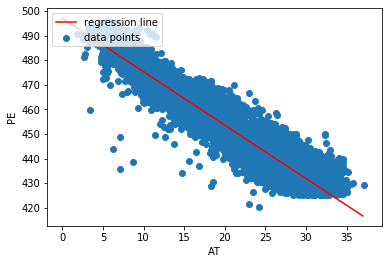

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline
x_line = np.arange(0, np.max(dataset["AT"]))
y_line = x_line * w_opt[1,0] + w_opt[0,0] 
plt.plot(x_line, y_line, color ="r", label='regression line')
plt.scatter(dataset["AT"].values, dataset["PE"].values, label='data points')
plt.xlabel('AT')
plt.ylabel('PE')
plt.legend(loc='upper left')

In [29]:
## Using Statistical Library
import statsmodels.formula.api as sm
results = sm.ols('PE ~ AT', dataset).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                 8.510e+04
Date:                Wed, 26 Feb 2020   Prob (F-statistic):               0.00
Time:                        14:13:34   Log-Likelihood:                -29756.
No. Observations:                9568   AIC:                         5.952e+04
Df Residuals:                    9566   BIC:                         5.953e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    497.0341      0.156   3177.280      0.0

In [30]:
y_line = 25 * w_opt[1,0] + w_opt[0,0] 
y_line

442.75112092982204

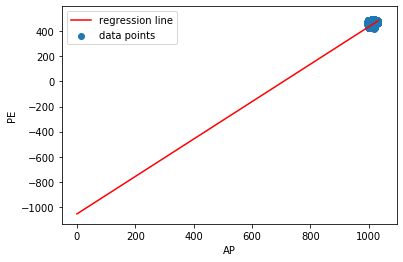

In [31]:
X = np.c_[np.ones((9568, 1)), dataset["AP"].values]
y = dataset["PE"].values.reshape((9568,1))

w_opt1 = np.linalg.inv((X.T).dot(X)).dot(X.T).dot(y)


x_line = np.arange(0, np.max(dataset["AP"]))
y_line = x_line * w_opt1[1,0] + w_opt1[0,0] 
plt.plot(x_line, y_line, color ="r", label='regression line')
plt.scatter(dataset["AP"].values, dataset["PE"].values, label='data points')
plt.xlabel('AP')
plt.ylabel('PE')
plt.legend(loc='upper left')

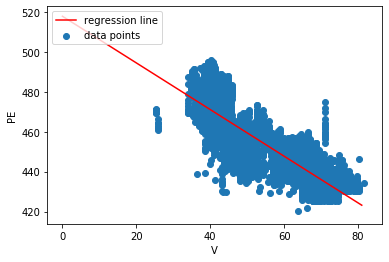

In [33]:
X = np.c_[np.ones((9568, 1)), dataset["V"].values]
y = dataset["PE"].values.reshape((9568,1))

w_opt2 = np.linalg.inv((X.T).dot(X)).dot(X.T).dot(y)


x_line = np.arange(0, np.max(dataset["V"]))
y_line = x_line * w_opt1[1,0] + w_opt1[0,0] 
plt.plot(x_line, y_line, color ="r", label='regression line')
plt.scatter(dataset["V"].values, dataset["PE"].values, label='data points')
plt.xlabel('V')
plt.ylabel('PE')
plt.legend(loc='upper left')

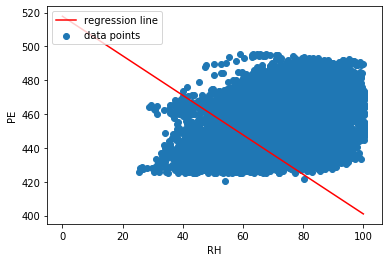

In [34]:
X = np.c_[np.ones((9568, 1)), dataset["RH"].values]
y = dataset["PE"].values.reshape((9568,1))

w_opt3 = np.linalg.inv((X.T).dot(X)).dot(X.T).dot(y)


x_line = np.arange(0, np.max(dataset["RH"]))
y_line = x_line * w_opt1[1,0] + w_opt1[0,0] 
plt.plot(x_line, y_line, color ="r", label='regression line')
plt.scatter(dataset["RH"].values, dataset["PE"].values, label='data points')
plt.xlabel('RH')
plt.ylabel('PE')
plt.legend(loc='upper left')

In [35]:
import statsmodels.formula.api as sm
results = sm.ols('PE ~ AP', dataset).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.269
Model:                            OLS   Adj. R-squared:                  0.269
Method:                 Least Squares   F-statistic:                     3516.
Date:                Wed, 26 Feb 2020   Prob (F-statistic):               0.00
Time:                        14:37:29   Log-Likelihood:                -39224.
No. Observations:                9568   AIC:                         7.845e+04
Df Residuals:                    9566   BIC:                         7.847e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1055.2610     25.459    -41.449      0.0

In [36]:
import statsmodels.formula.api as sm
results = sm.ols('PE ~ V', dataset).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                 2.972e+04
Date:                Wed, 26 Feb 2020   Prob (F-statistic):               0.00
Time:                        14:37:40   Log-Likelihood:                -33963.
No. Observations:                9568   AIC:                         6.793e+04
Df Residuals:                    9566   BIC:                         6.794e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    517.8015      0.378   1370.218      0.0

In [37]:
import statsmodels.formula.api as sm
results = sm.ols('PE ~ RH', dataset).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.152
Model:                            OLS   Adj. R-squared:                  0.152
Method:                 Least Squares   F-statistic:                     1714.
Date:                Wed, 26 Feb 2020   Prob (F-statistic):               0.00
Time:                        14:37:50   Log-Likelihood:                -39933.
No. Observations:                9568   AIC:                         7.987e+04
Df Residuals:                    9566   BIC:                         7.988e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    420.9618      0.823    511.676      0.0

In [38]:
import statsmodels.formula.api as sm
results = sm.ols('PE ~ AT + AP + V + RH', dataset).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 3.114e+04
Date:                Wed, 26 Feb 2020   Prob (F-statistic):               0.00
Time:                        14:39:40   Log-Likelihood:                -28088.
No. Observations:                9568   AIC:                         5.619e+04
Df Residuals:                    9563   BIC:                         5.622e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    454.6093      9.749     46.634      0.0

In [39]:
corr_matrix = dataset.corr()
print(corr_matrix)

          AT         V        AP        RH        PE
AT  1.000000  0.844107 -0.507549 -0.542535 -0.948128
V   0.844107  1.000000 -0.413502 -0.312187 -0.869780
AP -0.507549 -0.413502  1.000000  0.099574  0.518429
RH -0.542535 -0.312187  0.099574  1.000000  0.389794
PE -0.948128 -0.869780  0.518429  0.389794  1.000000
